**final paper**

In [1]:
from __future__ import print_function
from distutils.version import LooseVersion as Version
import sys

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.9 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == min_ver:
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(sys.version)
if pyversion >= "3.9":
    print(OK, "Python version is %s" % sys.version)
elif pyversion < "3.9":
    print(FAIL, "Python version 3.9 is required,"
                " but %s is installed." % sys.version)
else:
    print(FAIL, "Unknown Python version: %s" % sys.version)

    
print()
requirements = {'numpy': "1.21.1", 'matplotlib': "3.4.2",'sklearn': "0.24.2", 
                'pandas': "1.3.1",'xgboost': "1.3.3", 'shap': "0.39.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.9.7 | packaged by conda-forge | (default, Sep 14 2021, 01:11:01) [MSC v.1916 64 bit (AMD64)]

[ OK ] numpy version 1.21.1 is installed.
[ OK ] matplotlib version 3.4.2 is installed.
[ OK ] sklearn version 0.24.2 is installed.
[ OK ] pandas version 1.3.1 is installed.
[FAIL] xgboost version 1.3.3 is required, but 1.5.1 installed.
[ OK ] shap version 0.39.0 is installed.


In [2]:
#read dataset
import pandas as pd
import numpy as np
url="C:\\Users\\josh\\DATA1030-Fall2021\\mid-term\\Insurance.csv"
dataset = pd.read_csv(url)

In [3]:
y = dataset.iloc[:, 11:12] # target variable 
X = dataset.iloc[:, 1:11] # features

# target variable ratio
pp = dataset['Response'].value_counts()[1]/np.shape(X)[0]

In [3]:
np.shape(dataset)

(381109, 12)

In [5]:
# number of columns and rows
print("The number of columns and rows")
print("The number of row :     ", len(dataset.index))
print("The number of columns :   ", len(dataset.columns))

The number of columns and rows
The number of row :      381109
The number of columns :    12


In [9]:
# Missing data check
dataset.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [10]:
# the number of unique values per each feature
for i in dataset.columns:
    print(i, "    " ,dataset[i].nunique())

id      381109
Gender      2
Age      66
Driving_License      2
Region_Code      53
Previously_Insured      2
Vehicle_Age      3
Vehicle_Damage      2
Annual_Premium      48838
Policy_Sales_Channel      155
Vintage      290
Response      2


In [74]:
#EDA
# data type
pd.set_option('display.max_rows', None)
print()
print("The type of data")
print(dataset.dtypes)


The type of data
id                       int64
Gender                  object
Age                      int64
Driving_License          int64
Region_Code              int64
Previously_Insured       int64
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int64
Policy_Sales_Channel     int64
Vintage                  int64
Response                 int64
dtype: object


In [75]:
import matplotlib
from matplotlib import pylab as plt

In [76]:
# target variable
print(dataset['Response'].describe())

count    381109.000000
mean          0.122563
std           0.327936
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Response, dtype: float64


0    334399
1     46710
Name: Response, dtype: int64


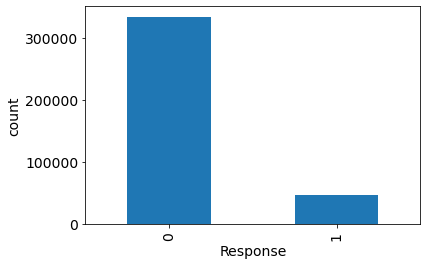

In [77]:
# target variable's bar chart


print(dataset['Response'].value_counts())
pd.value_counts(dataset['Response']).plot.bar()
plt.ylabel('count')
plt.xlabel('Response')
plt.show()


count     381109
unique         2
top         Male
freq      206089
Name: Gender, dtype: object
Male      206089
Female    175020
Name: Gender, dtype: int64


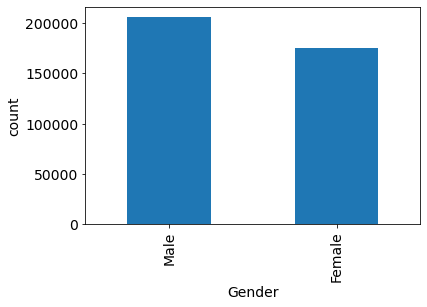

In [78]:
# categorical data visualization

# Gender
print(dataset['Gender'].describe())
print(dataset['Gender'].value_counts())
pd.value_counts(dataset['Gender']).plot.bar()
plt.ylabel('count')
plt.xlabel('Gender') 
plt.show()

count    381109.000000
mean          0.997869
std           0.046110
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Driving_License, dtype: float64
1    380297
0       812
Name: Driving_License, dtype: int64


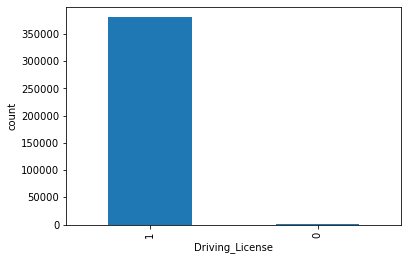

In [110]:
# Driver License
print(dataset['Driving_License'].describe())
print(dataset['Driving_License'].value_counts())
pd.value_counts(dataset['Driving_License']).plot.bar()
plt.ylabel('count')
plt.xlabel('Driving_License')
plt.savefig('DL.png', dpi=300) 
plt.show()

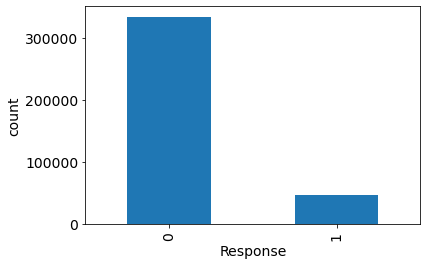

In [99]:
pd.value_counts(dataset['Response']).plot.bar()
plt.ylabel('count')
plt.xlabel('Response')
plt.show()

In [100]:
#print(dataset['Region_Code'].describe())
#print(dataset['Region_Code'].value_counts())
#pd.value_counts(dataset['Region_Code']).plot.bar()
#plt.ylabel('count')
#plt.xlabel('Region_Code')
#plt.show()

In [70]:
np.shape(pd.DataFrame(dataset['Region_Code'].value_counts()))

(53, 1)

In [104]:
#print(dataset['Policy_Sales_Channel'].value_counts())
#pd.value_counts(dataset['Policy_Sales_Channel']).plot.bar()
#plt.ylabel('count')
#plt.xlabel('Policy_Sales_Channel')
#plt.show()

0    206481
1    174628
Name: Previously_Insured, dtype: int64


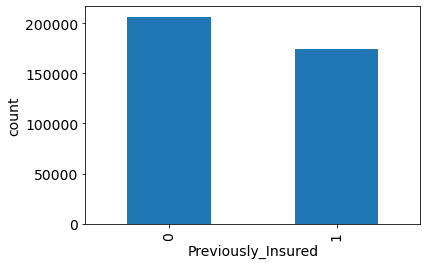

In [105]:
print(dataset['Previously_Insured'].value_counts())
pd.value_counts(dataset['Previously_Insured']).plot.bar()
plt.ylabel('count')
plt.xlabel('Previously_Insured')
plt.show()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64


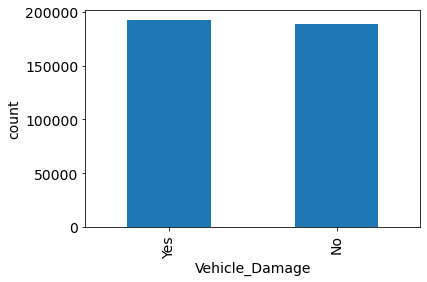

In [106]:
print(dataset['Vehicle_Damage'].value_counts())
pd.value_counts(dataset['Vehicle_Damage']).plot.bar()
plt.ylabel('count')
plt.xlabel('Vehicle_Damage')
#plt.savefig('damage.png', dpi=300) 
plt.show()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64


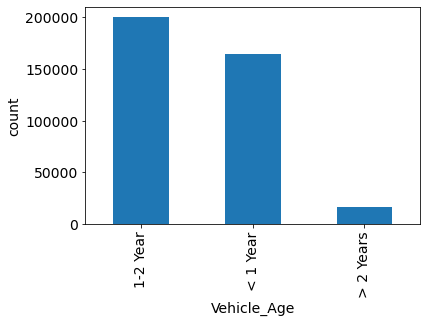

In [107]:
print(dataset["Vehicle_Age"].value_counts())
pd.value_counts(dataset["Vehicle_Age"]).plot.bar()
plt.ylabel('count')
plt.xlabel("Vehicle_Age")
#plt.savefig('Vehicle_Age.png', dpi=300) 
plt.show()

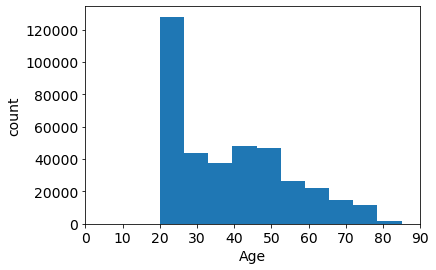

In [109]:
# continuous data visualization
#print(dataset['Age'].describe())
#print(dataset["Age"].value_counts())
dataset['Age'].plot.hist(bins=10)
plt.xticks(np.arange(0,100,10))
plt.xlabel('Age')
plt.ylabel('count')
#plt.savefig('Age.png', dpi=300) 
plt.show()

In [110]:
#print(dataset['Annual_Premium'].describe())
#print(dataset["Annual_Premium"].value_counts())

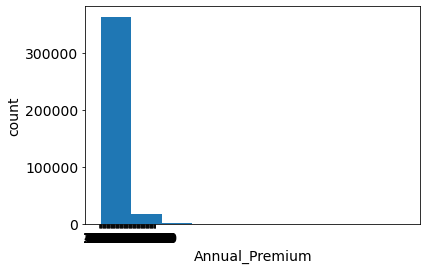

In [111]:
dataset["Annual_Premium"].plot.hist(bins=10)
plt.xticks(np.arange(0,100000,1000))
plt.xlabel("Annual_Premium")
plt.ylabel('count')
plt.savefig('Premium.png', dpi=300) 
plt.show()

In [112]:
#print(dataset["Vintage"].value_counts())

In [113]:
#dataset["Vintage"].plot.hist(bins=100)
#plt.xticks(np.arange(0,300,50))
#plt.xlabel("Vintage")
#plt.ylabel('count')
#plt.savefig('Vintage.png', dpi=300) 
#plt.show()

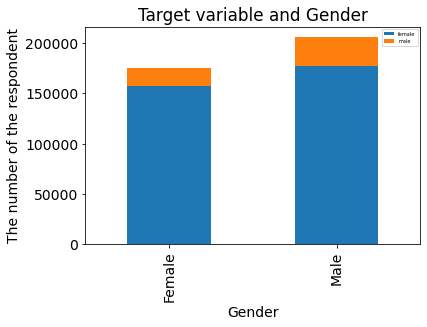

In [114]:
# Visualization between Target variable and Categorical variable 
count_matrix = dataset.groupby(['Gender', 'Response']).size().unstack()
#print(count_matrix)
#print("*****************************************************************")
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
#print(count_matrix_norm)
count_matrix.plot(kind='bar', stacked=True)
plt.title('Target variable and Gender')
plt.ylabel('The number of the respondent')
plt.legend(['female', 'male'], loc=0)
plt.show()

Response              0      1
Driving_License               
0                   771     41
1                333628  46669
*****************************************************************
Response                0         1
Driving_License                    
0                0.949507  0.050493
1                0.877283  0.122717


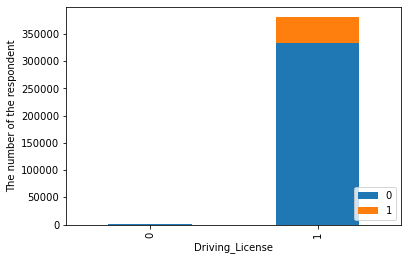

<Figure size 432x288 with 0 Axes>

In [50]:
count_matrix = dataset.groupby(['Driving_License', 'Response']).size().unstack()
print(count_matrix)
print("*****************************************************************")
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

count_matrix.plot(kind='bar', stacked=True)
plt.ylabel('The number of the respondent')
plt.legend(loc=4)
plt.savefig('test.png', dpi=300) 
plt.show()


In [115]:
#count_matrix = dataset.groupby([ 'Region_Code', 'Response']).size().unstack()
#print(count_matrix)
#print("*****************************************************************")
#count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

#count_matrix.plot(kind='bar', stacked=True)
#plt.ylabel('The number of the respondent')
#plt.legend(loc=4)
#plt.savefig('test.png', dpi=300) 
#plt.show()

Response         0         1
Gender                      
Female    0.896098  0.103902
Male      0.861589  0.138411


In [116]:
#count_matrix = dataset.groupby([ 'Policy_Sales_Channel', 'Response']).size().unstack()
#print(count_matrix)
#print("*****************************************************************")
#count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
#print(count_matrix_norm)

#count_matrix.plot(kind='bar', stacked=True)
#plt.ylabel('The number of the respondent')
#plt.legend(loc=4)
#plt.savefig('chanell&response.png', dpi=300) 
#plt.show()

Response                 0      1
Previously_Insured               
0                   159929  46552
1                   174470    158
*****************************************************************
Response                   0         1
Previously_Insured                    
0                   0.774546  0.225454
1                   0.999095  0.000905


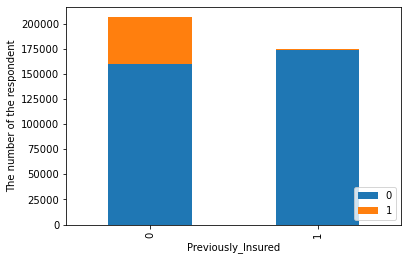

<Figure size 432x288 with 0 Axes>

In [52]:
count_matrix = dataset.groupby([ 'Previously_Insured', 'Response']).size().unstack()
print(count_matrix)
print("*****************************************************************")
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

count_matrix.plot(kind='bar', stacked=True)
plt.ylabel('The number of the respondent')
plt.legend(loc=4)
plt.savefig('test.png', dpi=300) 
plt.show()


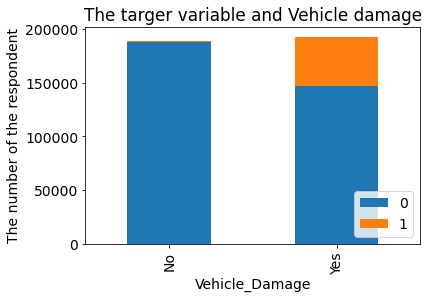

In [91]:
count_matrix = dataset.groupby([ 'Vehicle_Damage', 'Response']).size().unstack()
#print(count_matrix)
#print("*****************************************************************")
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
#print(count_matrix_norm)

count_matrix.plot(kind='bar', stacked=True)
plt.ylabel('The number of the respondent')
plt.legend(loc=4)
plt.title('The targer variable and Vehicle damage')
plt.show()


Response            0         1
Vehicle_Age                    
1-2 Year     0.826245  0.173755
< 1 Year     0.956295  0.043705
> 2 Years    0.706254  0.293746


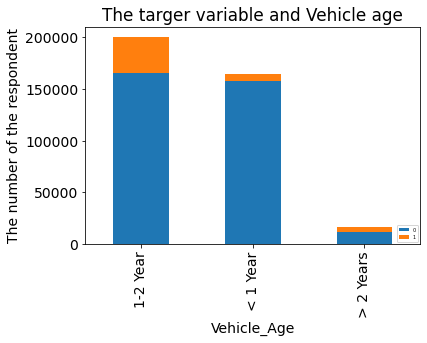

In [117]:
count_matrix = dataset.groupby([ 'Vehicle_Age', 'Response']).size().unstack()
#print(count_matrix)
#print("*****************************************************************")
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

count_matrix.plot(kind='bar', stacked=True)
plt.title('The targer variable and Vehicle age')
plt.ylabel('The number of the respondent')
plt.legend(loc=4)

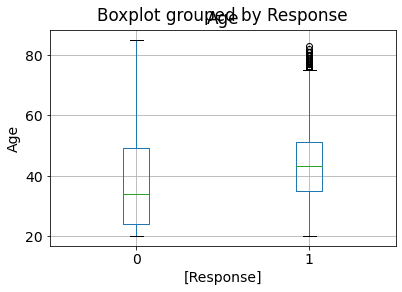

In [118]:
# Visualization between Target variable and Contiuous variable

dataset[['Age','Response']].boxplot(by='Response')
plt.ylabel('Age')
plt.savefig('test.png', dpi=300) 
plt.show()

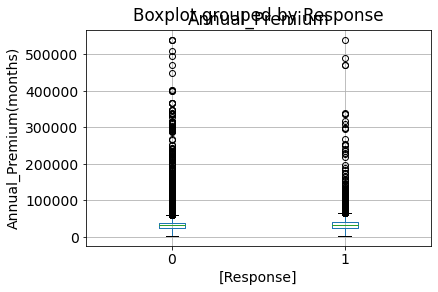

In [119]:
plt.rc('legend', fontsize=5)
dataset[['Annual_Premium','Response']].boxplot(by='Response')

plt.ylabel('Annual_Premium(months)')
plt.show()

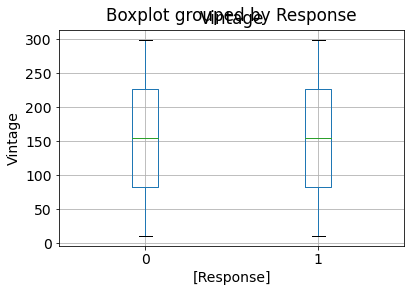

In [120]:
dataset[['Vintage','Response']].boxplot(by='Response')
plt.ylabel('Vintage')
plt.show()


In [33]:
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import xgboost
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pylab as plt
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold

In [4]:
y = dataset.iloc[:, 11:12] # target variable 
X = dataset.iloc[:, 1:11] # features

# target variable ratio
pp = dataset['Response'].value_counts()[1]/np.shape(X)[0]
print(pp)

0.12256336113815208


In [40]:
np.random.seed(92)
sample=dataset.groupby('Response', group_keys=False).apply(lambda x: x.sample(frac=0.3))

sample_y = sample.iloc[:, 11:12] # target variable 
sample_X = sample.iloc[:, 1:11] # features

# target variable ratio
ss = sample['Response'].value_counts()[1]/np.shape(sample)[0]
print(ss)


0.12254001574389924


In [6]:
# result
total_knn=[] # Scores for knn
total_log=[] # Scores for logstic regression
total_ran=[] # Scores for random forest
total_xg=[] # Scores for XGboost

**comparison of models**

No handles with labels found to put in legend.


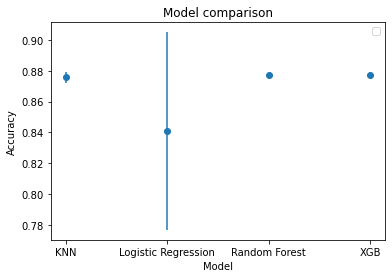

In [49]:
# comparison model
model = ['KNN', "Logistic Regression", "Random Forest", "XGB"]
mean_model = [np.mean(total_knn),np.mean(total_log),np.mean(total_ran), np.mean(total_xg)]
std = [np.std(total_knn),np.std(total_log),np.std(total_ran), np.std(total_xg)]
plt.errorbar(model,mean_model,yerr=std,fmt='o')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Model comparison')
plt.legend()
plt.show()

In [8]:
# confusion matrix
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Logistic Regression'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = np.array(classes)
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [10]:
def MLpipe_KFold_Accuracy(X, y, preprocessor, ML_algo, param_grid, kfold):  
      
    scores = []
    models = []
    
    for i in range(5) :
        
        # spiltting the dataset
        X_other, X_test, y_other, y_test = train_test_split(X,y,train_size = 0.8,random_state=i*10, stratify=y)
        
        # making K-folds
        kf = KFold(n_splits=kfold,shuffle=True,random_state=i*10,)
        pl = Pipeline(steps=[('preprocessor', preprocessor),('model', ML_algo)])
        pl2= Pipeline(steps=[('preprocessor', preprocessor)])
        
        #cross validation with MSE evaluation
        gsc = GridSearchCV(pl, param_grid=param_grid, scoring= 'accuracy',
                            cv=kf, return_train_score=True, n_jobs=-1)
        
        gsc.fit(X_other, y_other.values.ravel())
        
        # finding the best parameters
        best_param = gsc.best_params_
        
        # yielding testing score 
        test_score =  accuracy_score(y_test, gsc.predict(X_test))
        
        # collecting all scores and best models per each random state 
        scores.append(test_score)
        models.append(gsc.best_estimator_)
        
        feature_names = std_ftr + \
                list(gsc.best_estimator_[0].named_transformers_['cat'][0].get_feature_names(ctg_ftr))   
    
    return gsc, models, scores, X_test, y_test,  feature_names
    
# preprocessing

ctg_ftr = [ "Gender","Driving_License", 'Region_Code','Policy_Sales_Channel', 'Previously_Insured',  'Vehicle_Damage', 'Vehicle_Age']
std_ftr = ["Age","Annual_Premium","Vintage"]
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])



preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, std_ftr),
            ('cat', categorical_transformer, ctg_ftr)])

**KNN with sample data**

In [41]:
ML_algo =  KNeighborsClassifier()
param_grid = {'model__n_neighbors': [3,5,7,20,30] , 'model__weights': ['uniform', 'distance']}
gsc, models, scores, X_test, y_test,  feature_names = MLpipe_KFold_Accuracy(sample_X,sample_y,preprocessor,ML_algo,param_grid,3)
total_knn.append(scores)
print("mean is"  , np.mean(scores))
print("standard deviation is ", np.std(scores) )

mean is 0.8754914809960681
standard deviation is  0.0034176683644575024


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

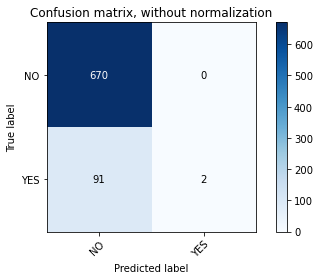

In [42]:
y_predict=gsc.predict(X_test)
plot_confusion_matrix(y_test,y_predict,classes=['NO','YES'],normalize=False)

In [182]:
import pickle
file = open('gsc_KNN.save', 'wb')
pickle.dump((gsc,X_test,y_test),file)
file.close()

In [31]:
total_knn

[[0.880115424973767,
  0.8714585519412382,
  0.8806400839454355,
  0.8690975865687304,
  0.8717208814270724]]

**Logistic Regression** 

In [6]:
ML_algo =  LogisticRegression()
param_grid = {'model__fit_intercept' : ['False'] ,'model__penalty': ['l2'] , 'model__C': [0.01, 0.1, 10, 50, 100], 'model__solver' : ['lbfgs'],'model__max_iter' : [10000000] }
models, scores = MLpipe_KFold_Accuracy(X,y,preprocessor,ML_algo,param_grid,3)
total_log.append(scores)
print("mean is"  , np.mean(scores) )
print("standard deviation is ", np.std(scores) )

mean is 0.877205181356214
standard deviation is  0.0002466882663127928


In [43]:
ML_algo =  LogisticRegression()
param_grid = {'model__class_weight' : ['balanced', 'False'] , 'model__fit_intercept' : [0],  'model__penalty': ['l2'] , 'model__C': [0.01, 0.1, 10, 100], 'model__solver' : ['saga'],'model__max_iter' : [10000000] }
gsc, models, scores, X_test, y_test, feature_names = MLpipe_KFold_Accuracy(sample_X,sample_y,preprocessor,ML_algo,param_grid,3)
total_log.append(scores)
print("mean is"  , np.mean(scores) )
print("standard deviation is ", np.std(scores) )

mean is 0.8775884665792922
standard deviation is  0.0010484927916120767


In [187]:
import pickle
file = open('gsc_LG.save', 'wb')
pickle.dump((gsc,X_test,y_test),file)
file.close()

<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

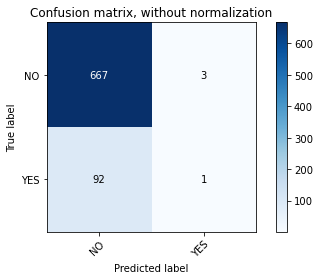

In [44]:
y_predict=gsc.predict(X_test)
plot_confusion_matrix(y_test,y_predict,classes=['NO','YES'],normalize=False)

**Permuation feature importance**

In [185]:
ftr_names=X.columns

np.random.seed(42)

nr_runs = 10
scores = np.zeros([len(ftr_names),nr_runs])

test_score = gsc.score(X_test,y_test.values.ravel())
print('test score = ',test_score)
print('test baseline = ',np.sum(y_test == 0)/len(y_test))
# loop through the features
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        acc_scores.append(gsc.score(X_test_shuffled,y_test))
    print('shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

test score =  0.8788276350659915
test baseline =  Response    0.878801
dtype: float64
shuffling Gender
shuffled test score: 0.879 +/- 0.0
shuffling Age
shuffled test score: 0.877 +/- 0.0
shuffling Driving_License
shuffled test score: 0.879 +/- 0.0
shuffling Region_Code
shuffled test score: 0.879 +/- 0.0
shuffling Previously_Insured
shuffled test score: 0.879 +/- 0.0
shuffling Vehicle_Age
shuffled test score: 0.879 +/- 0.0
shuffling Vehicle_Damage
shuffled test score: 0.879 +/- 0.0
shuffling Annual_Premium
shuffled test score: 0.879 +/- 0.0
shuffling Policy_Sales_Channel
shuffled test score: 0.879 +/- 0.0
shuffling Vintage
shuffled test score: 0.879 +/- 0.0


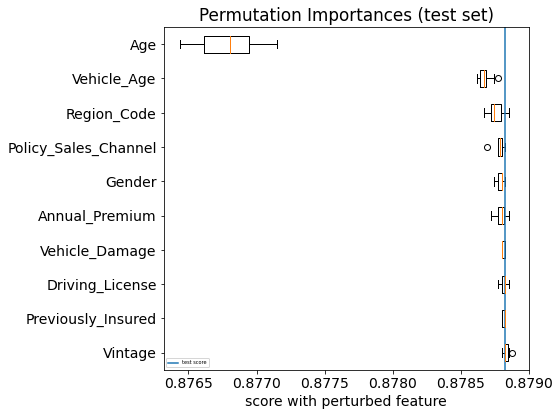

In [186]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.show()

**Global feature importance with Coefficient** 

In [175]:
def MLpipe_KFold_Accuracy2(X, y, preprocessor, ML_algo, param_grid, kfold):  
      
    scores = []
    models = []
    
    for i in range(5) :
        
        # spiltting the dataset
        X_other, X_test, y_other, y_test = train_test_split(X,y,train_size = 0.8,random_state=i*10)
        
        
        # final scaler
        final_scaler = StandardScaler()
        
        # making K-folds
        kf = KFold(n_splits=kfold,shuffle=True,random_state=i*10)
        pl = Pipeline(steps=[('preprocessor', preprocessor),('final',  final_scaler), ('model', ML_algo)])
        
        #cross validation with MSE evaluation
        gsc = GridSearchCV(pl, param_grid=param_grid, scoring= 'accuracy',
                            cv=kf, return_train_score=True, n_jobs=-1)
        
        gsc.fit(X_other, y_other.values.ravel())
        
        # finding the best parameters
        best_param = gsc.best_params_
        
        # yielding testing score 
        test_score =  accuracy_score(y_test, gsc.predict(X_test))
        
        # collecting all scores and best models per each random state 
        scores.append(test_score)
        models.append(gsc.best_estimator_)
        
        feature_names = std_ftr + \
                list(gsc.best_estimator_[0].named_transformers_['cat'][0].get_feature_names(ctg_ftr))
    return gsc, models, scores, X_test, y_test, np.array(feature_names)
    
# preprocessing

ctg_ftr = [ "Gender","Driving_License", 'Region_Code','Policy_Sales_Channel', 'Previously_Insured',  'Vehicle_Damage', 'Vehicle_Age']
std_ftr = ["Age","Annual_Premium","Vintage"]
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])



preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, std_ftr),
            ('cat', categorical_transformer, ctg_ftr)])

In [176]:
ML_algo =  LogisticRegression()
param_grid = {'model__fit_intercept' : [0], 'model__penalty': ['l2'] , 'model__C': [0.01, 0.1, 10, 100], 'model__solver' : ['lbfgs'],'model__max_iter' : [10000000] }
gsc, models, scores, X_test, y_test, feature_names = MLpipe_KFold_Accuracy2(sample_X,sample_y,preprocessor,ML_algo,param_grid,3)

coefs = gsc.best_estimator_[-1].coef_[0]
sorted_indcs = np.argsort(np.abs(coefs))


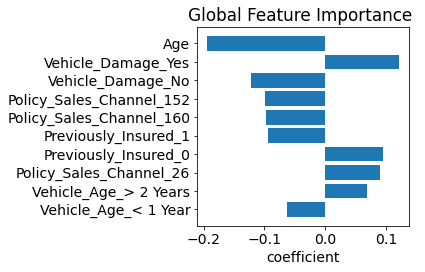

In [177]:
plt.rcParams.update({'font.size': 14})
plt.barh(np.arange(10),coefs[sorted_indcs[-10:]])
plt.yticks(np.arange(10),feature_names[sorted_indcs[-10:]])
plt.xlabel('coefficient')
plt.title('Global Feature Importance ')
plt.tight_layout()
plt.show()

**Random Forest**

In [55]:
ML_algo =  RandomForestClassifier()
param_grid = {'model__min_samples_split': [16, 32, 64, 128] , 'model__max_depth':  [10,30,100,300]}
gsc, models, scores, X_test, y_test, feature_names =  MLpipe_KFold_Accuracy(sample_X,sample_y,preprocessor,ML_algo,param_grid,3)
total_ran.append(scores)
print("mean is"  , np.mean(scores) )
print("standard deviation is ", np.std(scores) )

mean is 0.8778505897771953
standard deviation is  0.0005242463958060384


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

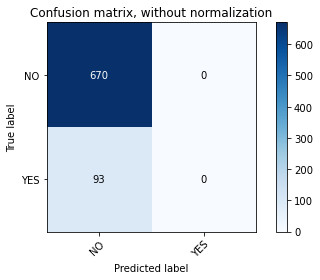

In [46]:
y_predict=gsc.predict(X_test)
plot_confusion_matrix(y_test,y_predict,classes=['NO','YES'],normalize=False)

**MDI Global feature importance**

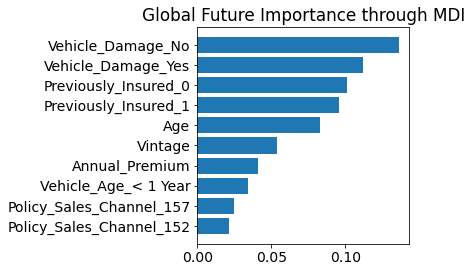

In [65]:
importances = gsc.best_estimator_[-1].feature_importances_
sorted_idx = importances.argsort()[-10:]
id = []
for i in sorted_idx :
    id.append(feature_names[i])
    
y_ticks = np.arange(0, 10)
fig, ax = plt.subplots()
ax.barh(y_ticks, importances[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(id)
ax.set_title("Global Future Importance through MDI")
fig.tight_layout()
plt.show()


**SHAP values with random forest**

In [57]:
import shap
shap.initjs() 
explainer = shap.TreeExplainer(gsc.best_estimator_[1])
X_test_transformed = gsc.best_estimator_[0].transform(X_test)
shap_values = explainer.shap_values(X_test_transformed[:1000])

In [60]:
y_predict=gsc.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [62]:
index = 100# the index of the point to explain
print(explainer.expected_value[0]) # we explain class 0 predictions
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_transformed[index,:],feature_names = feature_names)

0.8767749343832022


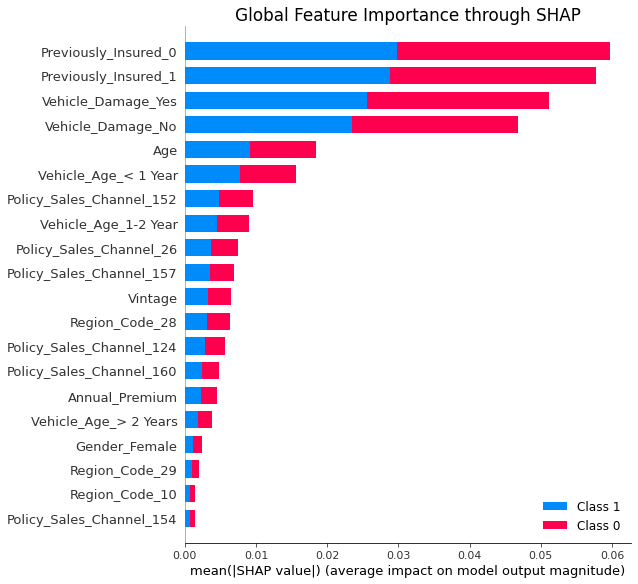

In [58]:
plt.title("Global Feature Importance through SHAP")
shap.summary_plot(shap_values, X_test_transformed[:1000],feature_names = feature_names)

**XGboost**

In [47]:
ML_algo =  xgboost.XGBClassifier()
param_grid = {'model__learning_rate' : [0.03,0.05], 'model__max_depth' : [5,10,50,30,50] }
gsc, models, scores, X_test, y_test, feature_names  = MLpipe_KFold_Accuracy(sample_X,sample_y,preprocessor,ML_algo,param_grid,3)
total_xg.append(scores)
print("mean is"  , np.mean(scores) )
print("standard deviation is ", np.std(scores) )

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[18:00:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[18:01:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[18:01:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[18:02:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[18:02:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
mean is 0.8778505897771953
standard deviation is  0.0005242463958060384


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

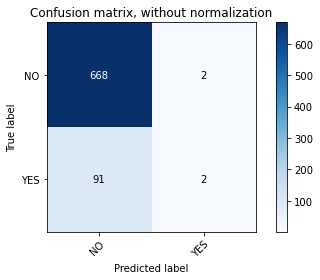

In [48]:
y_predict=gsc.predict(X_test)
plot_confusion_matrix(y_test,y_predict,classes=['NO','YES'],normalize=False)